In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load training data

In [2]:
path = r"D:\lenovo\Kaggle\predict-student-performance-from-game-play"
train_path = path+"/train.csv"

In [3]:
print(train_path)

D:\lenovo\Kaggle\predict-student-performance-from-game-play/train.csv


In [4]:
train_df = pd.read_csv(train_path)

# Explore the training data

#### No. of training samples

In [5]:
len(train_df)

26296946

#### No. of columns and columns

In [6]:
train_df.columns, len(train_df.columns)

(Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
        'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
        'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
        'fullscreen', 'hq', 'music', 'level_group'],
       dtype='object'),
 20)

#### Shape of the training dataset

In [7]:
train_df.shape

(26296946, 20)

#### Datatype of each feature

In [8]:
train_df.dtypes

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen          int64
hq                  int64
music               int64
level_group        object
dtype: object

#### Total no. of unique sessions & events

In [9]:
train_df['session_id'].nunique(), train_df['index'].nunique(), train_df[['session_id','index']].nunique()

(23562,
 20348,
 session_id    23562
 index         20348
 dtype: int64)

In [10]:
train_df['event_name'].nunique(), train_df['name'].nunique()

(11, 6)

In [11]:
train_df['fqid'].nunique(), train_df['room_fqid'].nunique()

(128, 19)

In [12]:
train_df['text_fqid'].nunique(), train_df['fullscreen'].nunique()

(126, 2)

In [13]:
train_df['music'].nunique(), train_df['hq'].nunique()

(2, 2)

In [14]:
train_df['level_group'].nunique(), train_df['level'].nunique()

(3, 23)

In [15]:
train_df['event_name'].unique()

array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [16]:
train_df['name'].unique()

array(['basic', 'undefined', 'close', 'open', 'prev', 'next'],
      dtype=object)

In [17]:
train_df.head(5)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [18]:
# train_df.loc[train_df['session_id']==20090312431273200]

In [19]:
train_df.loc[train_df['session_id']==20090312431273200].count()

session_id        881
index             881
elapsed_time      881
event_name        881
name              881
level             881
page                0
room_coor_x       813
room_coor_y       813
screen_coor_x     813
screen_coor_y     813
hover_duration     65
text              384
fqid              652
room_fqid         881
text_fqid         384
fullscreen        881
hq                881
music             881
level_group       881
dtype: int64

In [20]:
# train_df.loc[train_df['session_id']==20090312433251036]

In [21]:
train_df.loc[train_df['session_id']==20090312433251036].count(axis=0)

session_id        1831
index             1831
elapsed_time      1831
event_name        1831
name              1831
level             1831
page                59
room_coor_x       1506
room_coor_y       1506
screen_coor_x     1506
screen_coor_y     1506
hover_duration     322
text               410
fqid              1171
room_fqid         1831
text_fqid          410
fullscreen        1831
hq                1831
music             1831
level_group       1831
dtype: int64

In [22]:
# train_df.tail()

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


In [24]:
# train_df.describe()

#### Re-assigning dtpyes to the columns to reduce memory usage

In [25]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

In [26]:
train_df_new = pd.read_csv(train_path, dtype=dtypes)

In [27]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int64   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(10), float32(5), float64(1), int32(1), int64(2), uint8(1)
memory usage: 1.5 GB


In [28]:
train_df_new.dtypes

session_id           int64
index                int64
elapsed_time         int32
event_name        category
name              category
level                uint8
page               float64
room_coor_x        float32
room_coor_y        float32
screen_coor_x      float32
screen_coor_y      float32
hover_duration     float32
text              category
fqid              category
room_fqid         category
text_fqid         category
fullscreen        category
hq                category
music             category
level_group       category
dtype: object

## Load training labels

In [29]:
train_labels = pd.read_csv(path+'/train_labels.csv')

#### Note: no. of labels do not match the no. of samples

In [30]:
len(train_labels)

424116

In [31]:
type(train_labels['session_id'][0])

str

In [32]:
train_labels[0:20]

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
5,20090314035813970_q1,1
6,20090314121766812_q1,1
7,20090314221187252_q1,0
8,20090314363702160_q1,1
9,20090314441803444_q1,1


#### From below we can say that, there are total 23563 unique sessions and 18 questions per session

In [33]:
len(train_df['session_id'].unique())

23562

In [34]:
23562*18

424116

In [35]:
len(train_labels['session_id'].unique())

424116

#### To check for a substring in dataframe column use: str.contains() method of dataframe column.
#### eg.: df['A'].str.contains('xyz')

#### Get all labels for a particular session id

In [36]:
train_labels.loc[train_labels['session_id'].str.contains('20090312431273200')]

,session_id,correct
0,20090312431273200_q1,1
23562,20090312431273200_q2,1
47124,20090312431273200_q3,1
70686,20090312431273200_q4,1
94248,20090312431273200_q5,1
117810,20090312431273200_q6,1
141372,20090312431273200_q7,1
164934,20090312431273200_q8,1
188496,20090312431273200_q9,1
212058,20090312431273200_q10,1


#### Splitting the session_id column into session_id and question

In [37]:
(train_labels['session_id'][0].split("_")[-1])

'q1'

In [38]:
int(train_labels['session_id'][0].split("_")[0])

20090312431273200

In [39]:
train_labels['session'] = train_labels['session_id'].apply(lambda x: int(x.split('_')[0]))

In [40]:
train_labels['qs'] = train_labels['session_id'].apply(lambda x: x.split("_")[-1])

In [41]:
train_labels.head(5)

,session_id,correct,session,qs
0,20090312431273200_q1,1,20090312431273200,q1
1,20090312433251036_q1,0,20090312433251036,q1
2,20090312455206810_q1,1,20090312455206810,q1
3,20090313091715820_q1,0,20090313091715820,q1
4,20090313571836404_q1,1,20090313571836404,q1


In [42]:
train_labels = train_labels.drop(['session_id'], axis=1)

In [43]:
train_labels.head(5)

,correct,session,qs
0,1,20090312431273200,q1
1,0,20090312433251036,q1
2,1,20090312455206810,q1
3,0,20090313091715820,q1
4,1,20090313571836404,q1


#### Qs 1. Number of sessions with correct value as 1 for q1?

In [44]:
train_labels.loc[(train_labels['qs'] == 'q1') & (train_labels['correct'] == 1)]

,correct,session,qs
0,1,20090312431273200,q1
2,1,20090312455206810,q1
4,1,20090313571836404,q1
5,1,20090314035813970,q1
6,1,20090314121766812,q1
...,...,...,...
23553,1,22100213133089136,q1
23554,1,22100215032067016,q1
23556,1,22100215241104530,q1
23557,1,22100215342220508,q1


#### Qs 2. All sessions with qs as q1?

In [45]:
X = train_labels.loc[(train_labels['qs']=='q1')]
X

,correct,session,qs
0,1,20090312431273200,q1
1,0,20090312433251036,q1
2,1,20090312455206810,q1
3,0,20090313091715820,q1
4,1,20090313571836404,q1
...,...,...,...
23557,1,22100215342220508,q1
23558,0,22100215460321130,q1
23559,1,22100217104993650,q1
23560,0,22100219442786200,q1


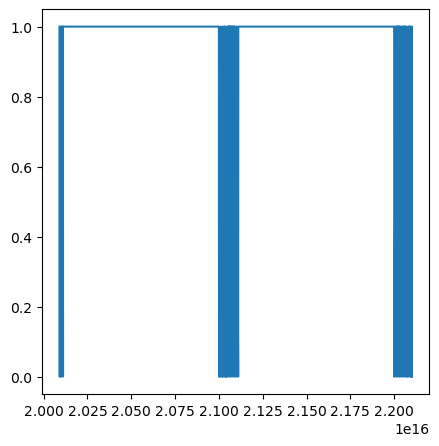

In [46]:
plt.figure(figsize=(5,5))
plt.plot(X['session'], X['correct'])

In [47]:
train_labels['correct'].value_counts()

1    299271
0    124845
Name: correct, dtype: int64

In [48]:
train_labels.correct.nunique()

2

In [50]:
train_labels['qs'] = train_labels['qs'].apply(lambda x: int(x.split('q')[-1]))#.apply(lambda x: int(x[1]))
train_labels

AttributeError: 'int' object has no attribute 'split'

# Prepare the dataset

#### Aggregate Features
As summarized in the competition overview, the dataset presents the questions and data to us in order of levels - level segments(represented by column level_group) 0-4, 5-12, and 13-22. We have to predict the correctness of each segment's questions as they are presented. To do this we will create basic aggregate features from the relevant columns. You can create more features to boost your scores.

First, we will create two separate lists with names of the Categorical columns and Numerical columns. We will avoid columns fullscreen, hq and music since they don't add any useful value for this problem statement.

In [54]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
        'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [55]:
train_df_new.shape, train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int64   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(10), float32(5), float64(1), int32(1), int64(2), uint8(1)
memory usage: 1.5 GB


((26296946, 20), None)

In [56]:
train_df_new.head(5)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [103]:
def feature_engineer(df):
    d = []
    main_df = pd.DataFrame()
    k = 0
    i = 0
    
    for c in CATEGORICAL:
        tmp = df.groupby(['session_id','level_group'])[c] # returns a groupby object
        tmp = tmp.agg('nunique') # returns a Series
        tmp.name = tmp.name + '_nunique'
       
        for i in range(len(tmp.keys())):
            d.append([tmp.keys()[i][0], tmp.keys()[i][1], tmp.ravel()[i]])
        
        tmp_df = pd.DataFrame(d, columns= ['session_id','level_group',tmp.name])  # create a dataframe for one categorical column
        d = []
        
        if k==0:
            main_df = pd.concat([main_df, tmp_df], axis = 1)
            k += 1
        else:
            main_df = main_df.merge(tmp_df, how= 'inner', on=['session_id', 'level_group'])

        
    i = 0
    
    for n in NUMERICAL:
        tmp = df.groupby(['session_id','level_group'])[n]
        tmp = tmp.agg('mean')
        tmp.name = tmp.name + '_mean'
        
        for i in range(len(tmp.keys())):
            d.append([tmp.keys()[i][0], tmp.keys()[i][1], tmp.ravel()[i]])
        
        tmp_df = pd.DataFrame(d, columns= ['session_id','level_group',tmp.name])  # create a dataframe for one categorical column
        d = []
        main_df = main_df.merge(tmp_df, how= 'inner', on=['session_id', 'level_group'])

        
    i = 0
        
    for n in NUMERICAL:
        tmp = df.groupby(['session_id','level_group'])[n]
        tmp = tmp.agg('std')
        tmp.name = tmp.name + '_std'
        
        for i in range(len(tmp.keys())):
            d.append([tmp.keys()[i][0], tmp.keys()[i][1], tmp.ravel()[i]])
        
        tmp_df = pd.DataFrame(d, columns= ['session_id','level_group',tmp.name])  # create a dataframe for one categorical column
        d = []
        main_df = main_df.merge(tmp_df, how= 'inner', on=['session_id', 'level_group'])

    main_df = main_df.fillna(-1)
    main_df = main_df.reset_index(drop=True)
    main_df = main_df.set_index('session_id')
    
    return main_df

In [104]:
train_df_prep = feature_engineer(train_df_new)

In [187]:
train_df_prep.columns

Index(['level_group', 'event_name_nunique', 'name_nunique', 'fqid_nunique',
       'room_fqid_nunique', 'text_fqid_nunique', 'elapsed_time_mean',
       'level_mean', 'page_mean', 'room_coor_x_mean', 'room_coor_y_mean',
       'screen_coor_x_mean', 'screen_coor_y_mean', 'hover_duration_mean',
       'elapsed_time_std', 'level_std', 'page_std', 'room_coor_x_std',
       'room_coor_y_std', 'screen_coor_x_std', 'screen_coor_y_std',
       'hover_duration_std'],
      dtype='object')

In [105]:
print(train_df_prep.shape)
train_df_prep

(70686, 22)


,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time_mean,level_mean,page_mean,room_coor_x_mean,...,screen_coor_y_mean,hover_duration_mean,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.000000,7.701275,...,383.044861,2389.500000,4.924654e+04,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.000000,-130.347168,...,379.301025,899.925903,1.266661e+05,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.000000,14.306062,...,378.784912,969.333313,8.017568e+04,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.000000,-84.045959,...,370.723083,1378.750000,6.737271e+04,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.100000,-30.762283,...,387.930084,720.384949,7.773825e+05,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,13-22,11,4,49,12,33,9.619192e+05,17.671395,5.230769,-158.599136,...,444.510040,1110.500000,1.516019e+05,2.359474,0.908083,589.562720,273.090325,248.584999,134.772721,1675.299532
22100219442786200,5-12,11,6,41,11,20,3.866058e+05,8.111511,1.833333,-2.569203,...,414.301208,1328.250000,9.665042e+04,2.180934,0.923548,390.345335,147.579436,250.827193,135.693654,1910.823123
22100221145014656,0-4,11,4,27,7,17,2.036104e+05,2.061611,0.333333,-1.339606,...,358.964813,4164.636230,1.085422e+05,1.276526,0.516398,392.539487,159.619091,213.638122,128.499750,6725.520698


# Split the prepared dataset into training & validation sets

In [106]:
def split_dataset(train_df_prep, test_ratio=0.20):
    USER_LIST = train_df_prep.index.unique()                # list of indices
    split = int(len(USER_LIST) * (1 - test_ratio))          # validation set: 14137, training set: 56548
    
    return train_df_prep.loc[USER_LIST[:split]], train_df_prep.loc[USER_LIST[split:]]

In [107]:
train_x, valid_x = split_dataset(train_df_prep)
print("{} examples in training, {} examples in testing.".format(len(train_x), len(valid_x)))

56547 examples in training, 14139 examples in testing.


In [108]:
# train_df_prep.index.unique(), int(len(train_df_prep.index.unique()) * (1 - 0.20)), 70686*0.20

In [109]:
train_x.head(5)

,level_group,event_name_nunique,name_nunique,fqid_nunique,room_fqid_nunique,text_fqid_nunique,elapsed_time_mean,level_mean,page_mean,room_coor_x_mean,...,screen_coor_y_mean,hover_duration_mean,elapsed_time_std,level_std,page_std,room_coor_x_std,room_coor_y_std,screen_coor_x_std,screen_coor_y_std,hover_duration_std
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,10,3,30,7,17,8.579356e+04,1.945455,-1.0,7.701275,...,383.044861,2389.500000,49246.539458,1.230975,-1.000000,399.296038,129.292411,214.871000,104.082743,3227.370757
20090312431273200,13-22,10,3,49,12,35,1.040601e+06,17.402381,-1.0,-130.347168,...,379.301025,899.925903,126666.129584,2.358652,-1.000000,622.061374,230.370874,240.280218,99.067861,1305.088265
20090312431273200,5-12,10,3,39,11,24,3.572052e+05,8.054054,-1.0,14.306062,...,378.784912,969.333313,80175.676658,2.096919,-1.000000,357.227701,137.409476,203.268560,120.255453,1316.408315
20090312433251036,0-4,11,4,22,6,11,9.763342e+04,1.870504,0.0,-84.045959,...,370.723083,1378.750000,67372.714092,1.232616,0.000000,445.980041,156.186242,252.554707,121.062929,2114.876406
20090312433251036,13-22,11,6,73,16,43,2.498852e+06,17.762529,5.1,-30.762283,...,387.930084,720.384949,777382.529186,1.825923,0.863075,529.575656,234.279590,259.288856,133.345693,1990.705518


# Training a model

I am training one model per question to predict if it will be qnswered correctly by a user. Thus there  will be 18 such models for 18 questions.

Creating dataframe for storing predictions on validation set.

In [110]:
VALID_USER_LIST = valid_x.index.unique()

In [111]:
prediction_df = pd.DataFrame(data=np.zeros((len(VALID_USER_LIST), 18)), index= VALID_USER_LIST)

In [112]:
models = {}

In [113]:
evaluation_dict = {}

In [114]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424116 entries, 0 to 424115
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   correct  424116 non-null  int64
 1   session  424116 non-null  int64
 2   qs       424116 non-null  int64
dtypes: int64(3)
memory usage: 9.7 MB


In [115]:
from sklearn import tree

In [116]:
train_labels.loc[train_labels.qs==1]

,correct,session,qs
0,1,20090312431273200,1
1,0,20090312433251036,1
2,1,20090312455206810,1
3,0,20090313091715820,1
4,1,20090313571836404,1
...,...,...,...
23557,1,22100215342220508,1
23558,0,22100215460321130,1
23559,1,22100217104993650,1
23560,0,22100219442786200,1


In [171]:
for qs in range(1, 19):
    if qs <=3:
        grp = '0-4'
    elif qs <=13:
        grp = '5-12'
    else:
        grp = '13-22'
        
    train_df = train_x.loc[train_x.level_group==grp]
    train_users = train_df.index.values
    valid_df = valid_x.loc[valid_x.level_group==grp]
    valid_users = valid_df.index.values
    
    print("QS: ", qs, "GROUP: ", grp)
    train_x_labels = train_labels.loc[train_labels.qs==qs].set_index('session').loc[train_users]
    valid_x_labels = train_labels.loc[train_labels.qs==qs].set_index('session').loc[valid_users]
    
    train_df["correct"] = train_x_labels["correct"]
    valid_df["correct"] = valid_x_labels["correct"]
    
    train_df = train_df.drop(labels=['level_group'], axis=1)
    valid_df = valid_df.drop(labels=['level_group'], axis=1)
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_df.drop(labels=['correct'], axis=1), train_df['correct'])
    
    models[f'{grp}_{qs}'] = clf
    
    evaluation_dict[qs] = clf.score(X=valid_df.drop(['correct'], axis=1), y=valid_df['correct'])
    
    predict = clf.predict(valid_df.drop(labels=['correct'], axis=1))
    prediction_df.loc[valid_users, qs-1] = predict.flatten()

QS:  1 GROUP:  0-4


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  2 GROUP:  0-4


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  3 GROUP:  0-4


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  4 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  5 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  6 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  7 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  8 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  9 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  10 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  11 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  12 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  13 GROUP:  5-12


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  14 GROUP:  13-22


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  15 GROUP:  13-22


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  16 GROUP:  13-22


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  17 GROUP:  13-22


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


QS:  18 GROUP:  13-22


C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["correct"] = train_x_labels["correct"]
C:\Users\Sanjo\AppData\Local\Temp\ipykernel_42456\2955790283.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["correct"] = valid_x_labels["correct"]


In [172]:
evaluation_dict

{1: 0.6168045830681095,
 2: 0.9503500954805856,
 3: 0.865478463823467,
 4: 0.6995544239338001,
 5: 0.5554848291958413,
 6: 0.6643326967960959,
 7: 0.6293231487375345,
 8: 0.5425419053681307,
 9: 0.6286866115001061,
 10: 0.5211118183747082,
 11: 0.5593040526204116,
 12: 0.7557818799066413,
 13: 0.6174411203055379,
 14: 0.6227455972841078,
 15: 0.5295989815404201,
 16: 0.6091661362189688,
 17: 0.5815828559304053,
 18: 0.9026098026734564}

In [174]:
print("Average accuracy: ", sum(evaluation_dict.values())/18)

Average accuracy:  0.6584388334865738


In [173]:
prediction_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
session_id,,,,,,,,,,,,,,,,,,
22000320020067784,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
22000321083750010,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
22000401381351532,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
22000407142860316,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
22000407572357990,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100215342220508,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
22100215460321130,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
22100217104993650,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [176]:
test_df = pd.read_csv(path+r'\test.csv')

In [177]:
test_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22,8
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,8


In [178]:
test_df = feature_engineer(test_df)

In [186]:
test_df.columns

Index(['level_group', 'event_name_nunique', 'name_nunique', 'fqid_nunique',
       'room_fqid_nunique', 'text_fqid_nunique', 'elapsed_time_mean',
       'level_mean', 'page_mean', 'room_coor_x_mean', 'room_coor_y_mean',
       'screen_coor_x_mean', 'screen_coor_y_mean', 'hover_duration_mean',
       'elapsed_time_std', 'level_std', 'page_std', 'room_coor_x_std',
       'room_coor_y_std', 'screen_coor_x_std', 'screen_coor_y_std',
       'hover_duration_std'],
      dtype='object')

In [181]:
test_pred = clf.predict(test_df.drop(labels=['level_group'], axis=1))

In [182]:
test_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [183]:
sample_sub = pd.read_csv(path+r'\sample_submission.csv')

In [184]:
sample_sub

,session_id,correct,session_level
0,20090109393214576_q1,0,0
1,20090312143683264_q1,0,3
2,20090312331414616_q1,0,6
3,20090109393214576_q2,0,0
4,20090312143683264_q2,0,3
5,20090312331414616_q2,0,6
6,20090109393214576_q3,0,0
7,20090312143683264_q3,0,3
8,20090312331414616_q3,0,6
9,20090109393214576_q4,0,1


### ROUGH

In [ ]:
x = pd.DataFrame({"Name":["Sanjogta","Dhananjay","Sanyukta","Gargi"],"Age":[29, 32, 29, 32]})
y = pd.DataFrame({'Gender':['F','M','F','F','M'], 'Profession':['Software Engg','Risk Analyst','Manager','Software Engg','QA']})

df1 = pd.concat([x, y], axis=1)
print(df1)
print(x.shape, y.shape)
print(df1.shape)

In [ ]:
d = []
main_df = pd.DataFrame()
i = 0
k = 0
for c in CATEGORICAL:
#     print(c)
    tmp = train_df_new.groupby(['session_id','level_group'])[c]
    
#     print(type(tmp))  # class 'pandas.core.groupby.generic.SeriesGroupBy'
#     print(tmp)        # pandas.core.groupby.generic.SeriesGroupBy object at 0x000002207FEA87F0
    
    tmp = tmp.agg('nunique') 
    
#     print(type(tmp))  # class 'pandas.core.series.Series'
#     print(tmp)
    tmp.name = tmp.name + '_nunique'
#     print(len(tmp.keys()))
    for i in range(len(tmp.keys())):
#         print(tmp.keys()[i][0], tmp.keys()[i][1], tmp.ravel()[i])
        d.append([tmp.keys()[i][0], tmp.keys()[i][1], tmp.ravel()[i]])

    df = pd.DataFrame(d, columns= ['session_id','level_group',tmp.name])  # create a dataframe for one categorical column
    d = []  # re-initiaize 'd' to hold next list
#     print("CATEGORICAL variable: ", c, "DataFrame: ", df)
    if k==0:
#         print('Hi')
        main_df = pd.concat([main_df, df], axis = 1)
    else:
#         print("hey")
        main_df = main_df.merge(df, how= 'inner', on=['session_id', 'level_group'])
#         print("DF: ", df)
#         print(main_df)
    k += 1
#     break

print(len(d), len(df), len(main_df))    
print(main_df.shape)

In [ ]:
main_df